<a href="https://colab.research.google.com/github/Abhimokashe/Linear-regression-transformation-and-label-encoding/blob/main/Label_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/archive(1).zip')

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


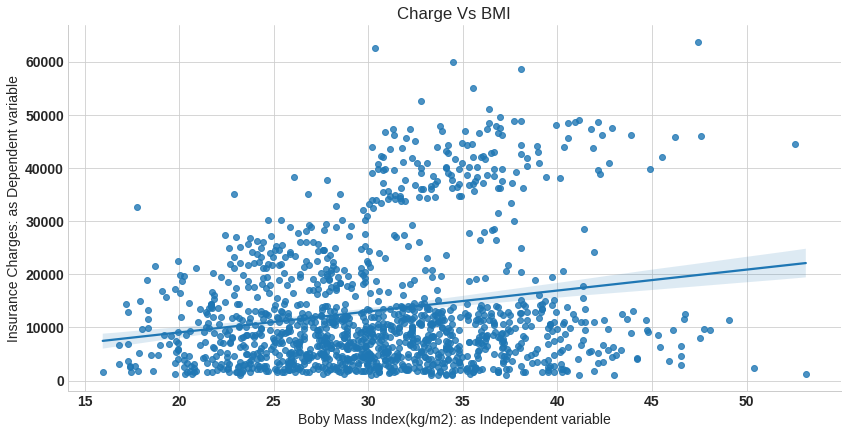

In [ ]:
""" for our visualization purpose will fit line using seaborn library only for bmi as independent variable 
and charges as dependent variable"""

sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index(kg/m2): as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

# Exploratory data analysis

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


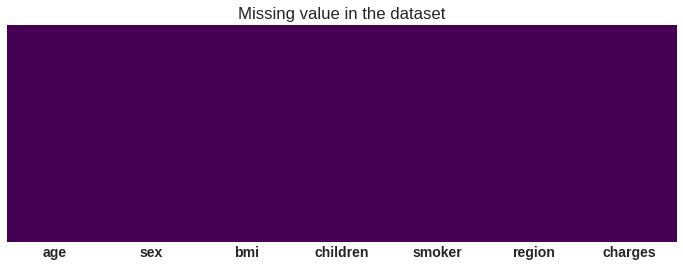

In [ ]:
#Check for missing value¶
#There is no missing value in the data sex
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

<function matplotlib.pyplot.show(close=None, block=None)>

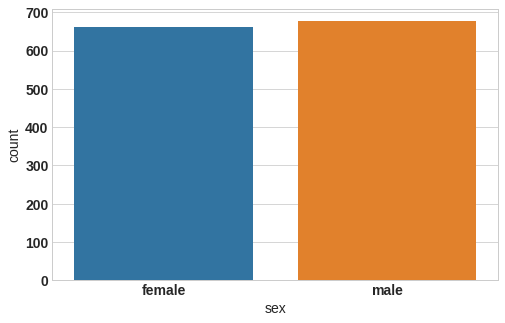

In [ ]:
sns.countplot(x='sex',data=df)
plt.show

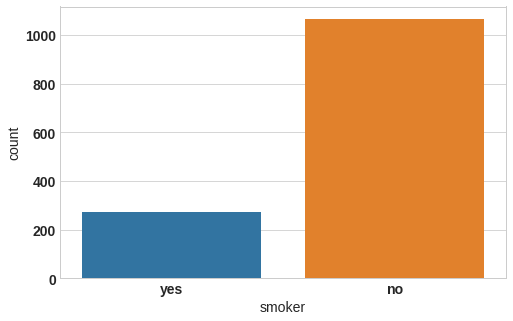

In [ ]:
sns.countplot(x='smoker',data=df)
plt.show()

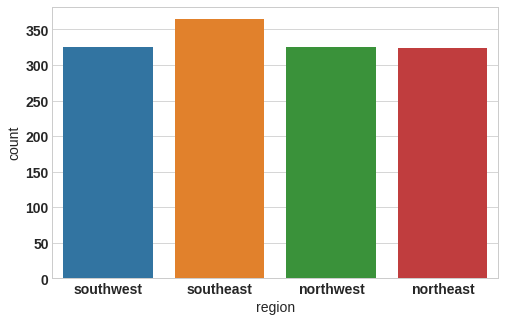

In [ ]:
sns.countplot(x='region',data=df)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


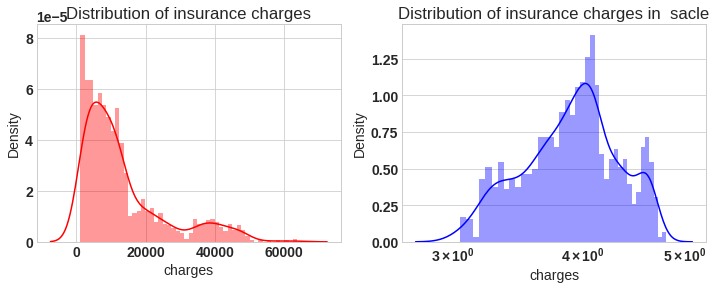

In [ ]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in  sacle')
ax.set_xscale('log');

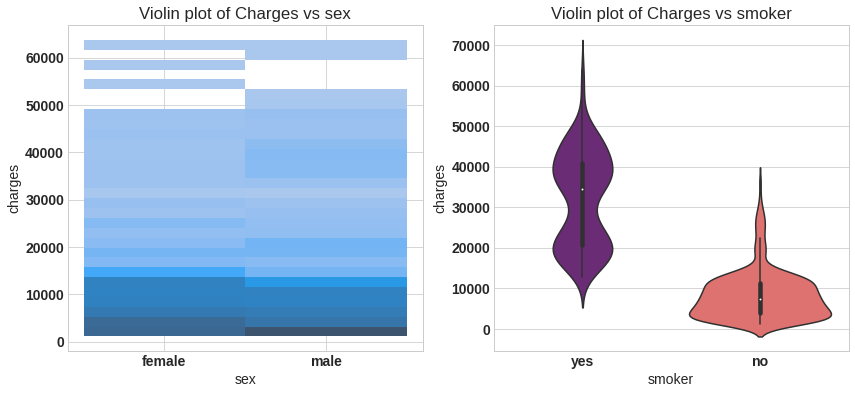

In [ ]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.histplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

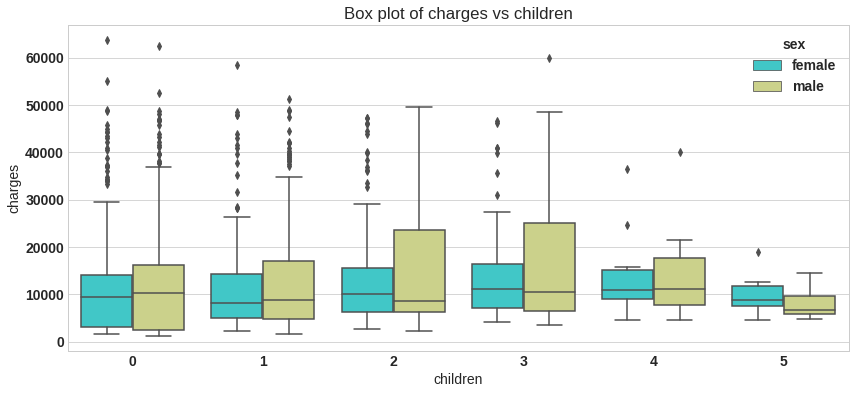

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children');

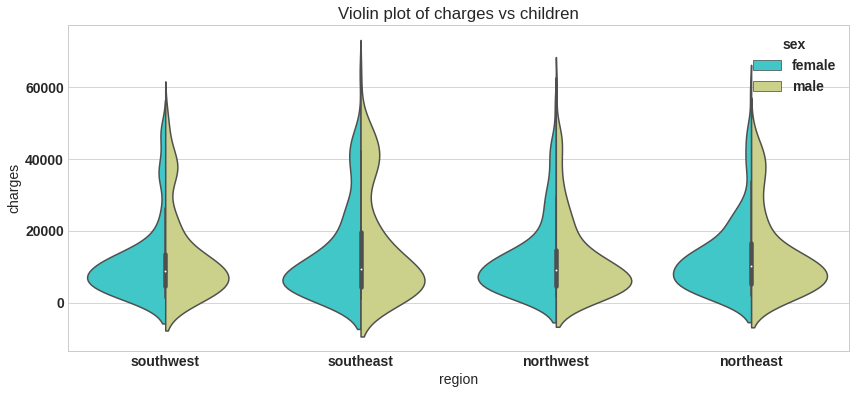

In [ ]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex',data=df,palette='rainbow',split=True)
plt.title('Violin plot of charges vs children');

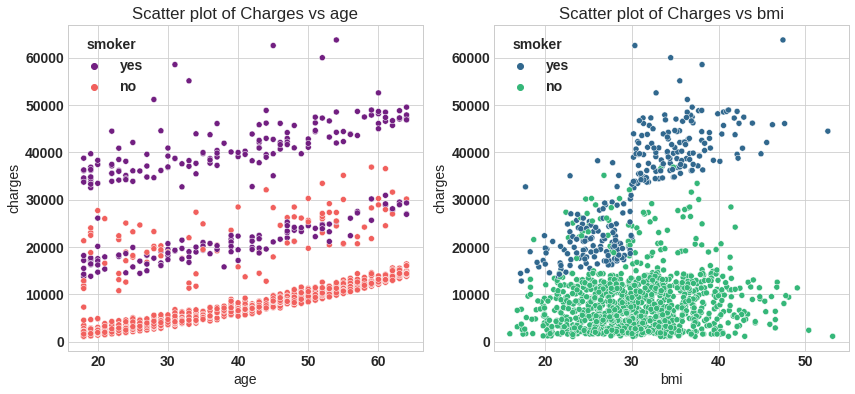

In [ ]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

# Data Preprocessing

In [ ]:
# Dummy variable
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')
     


In [ ]:
# Lets verify the dummay variable process
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


In [ ]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1338 non-null   int64  
 1   bmi            1338 non-null   float64
 2   charges        1338 non-null   float64
 3   OHE_male       1338 non-null   int8   
 4   OHE_1          1338 non-null   int8   
 5   OHE_2          1338 non-null   int8   
 6   OHE_3          1338 non-null   int8   
 7   OHE_4          1338 non-null   int8   
 8   OHE_5          1338 non-null   int8   
 9   OHE_yes        1338 non-null   int8   
 10  OHE_northwest  1338 non-null   int8   
 11  OHE_southeast  1338 non-null   int8   
 12  OHE_southwest  1338 non-null   int8   
dtypes: float64(2), int64(1), int8(10)
memory usage: 44.6 KB


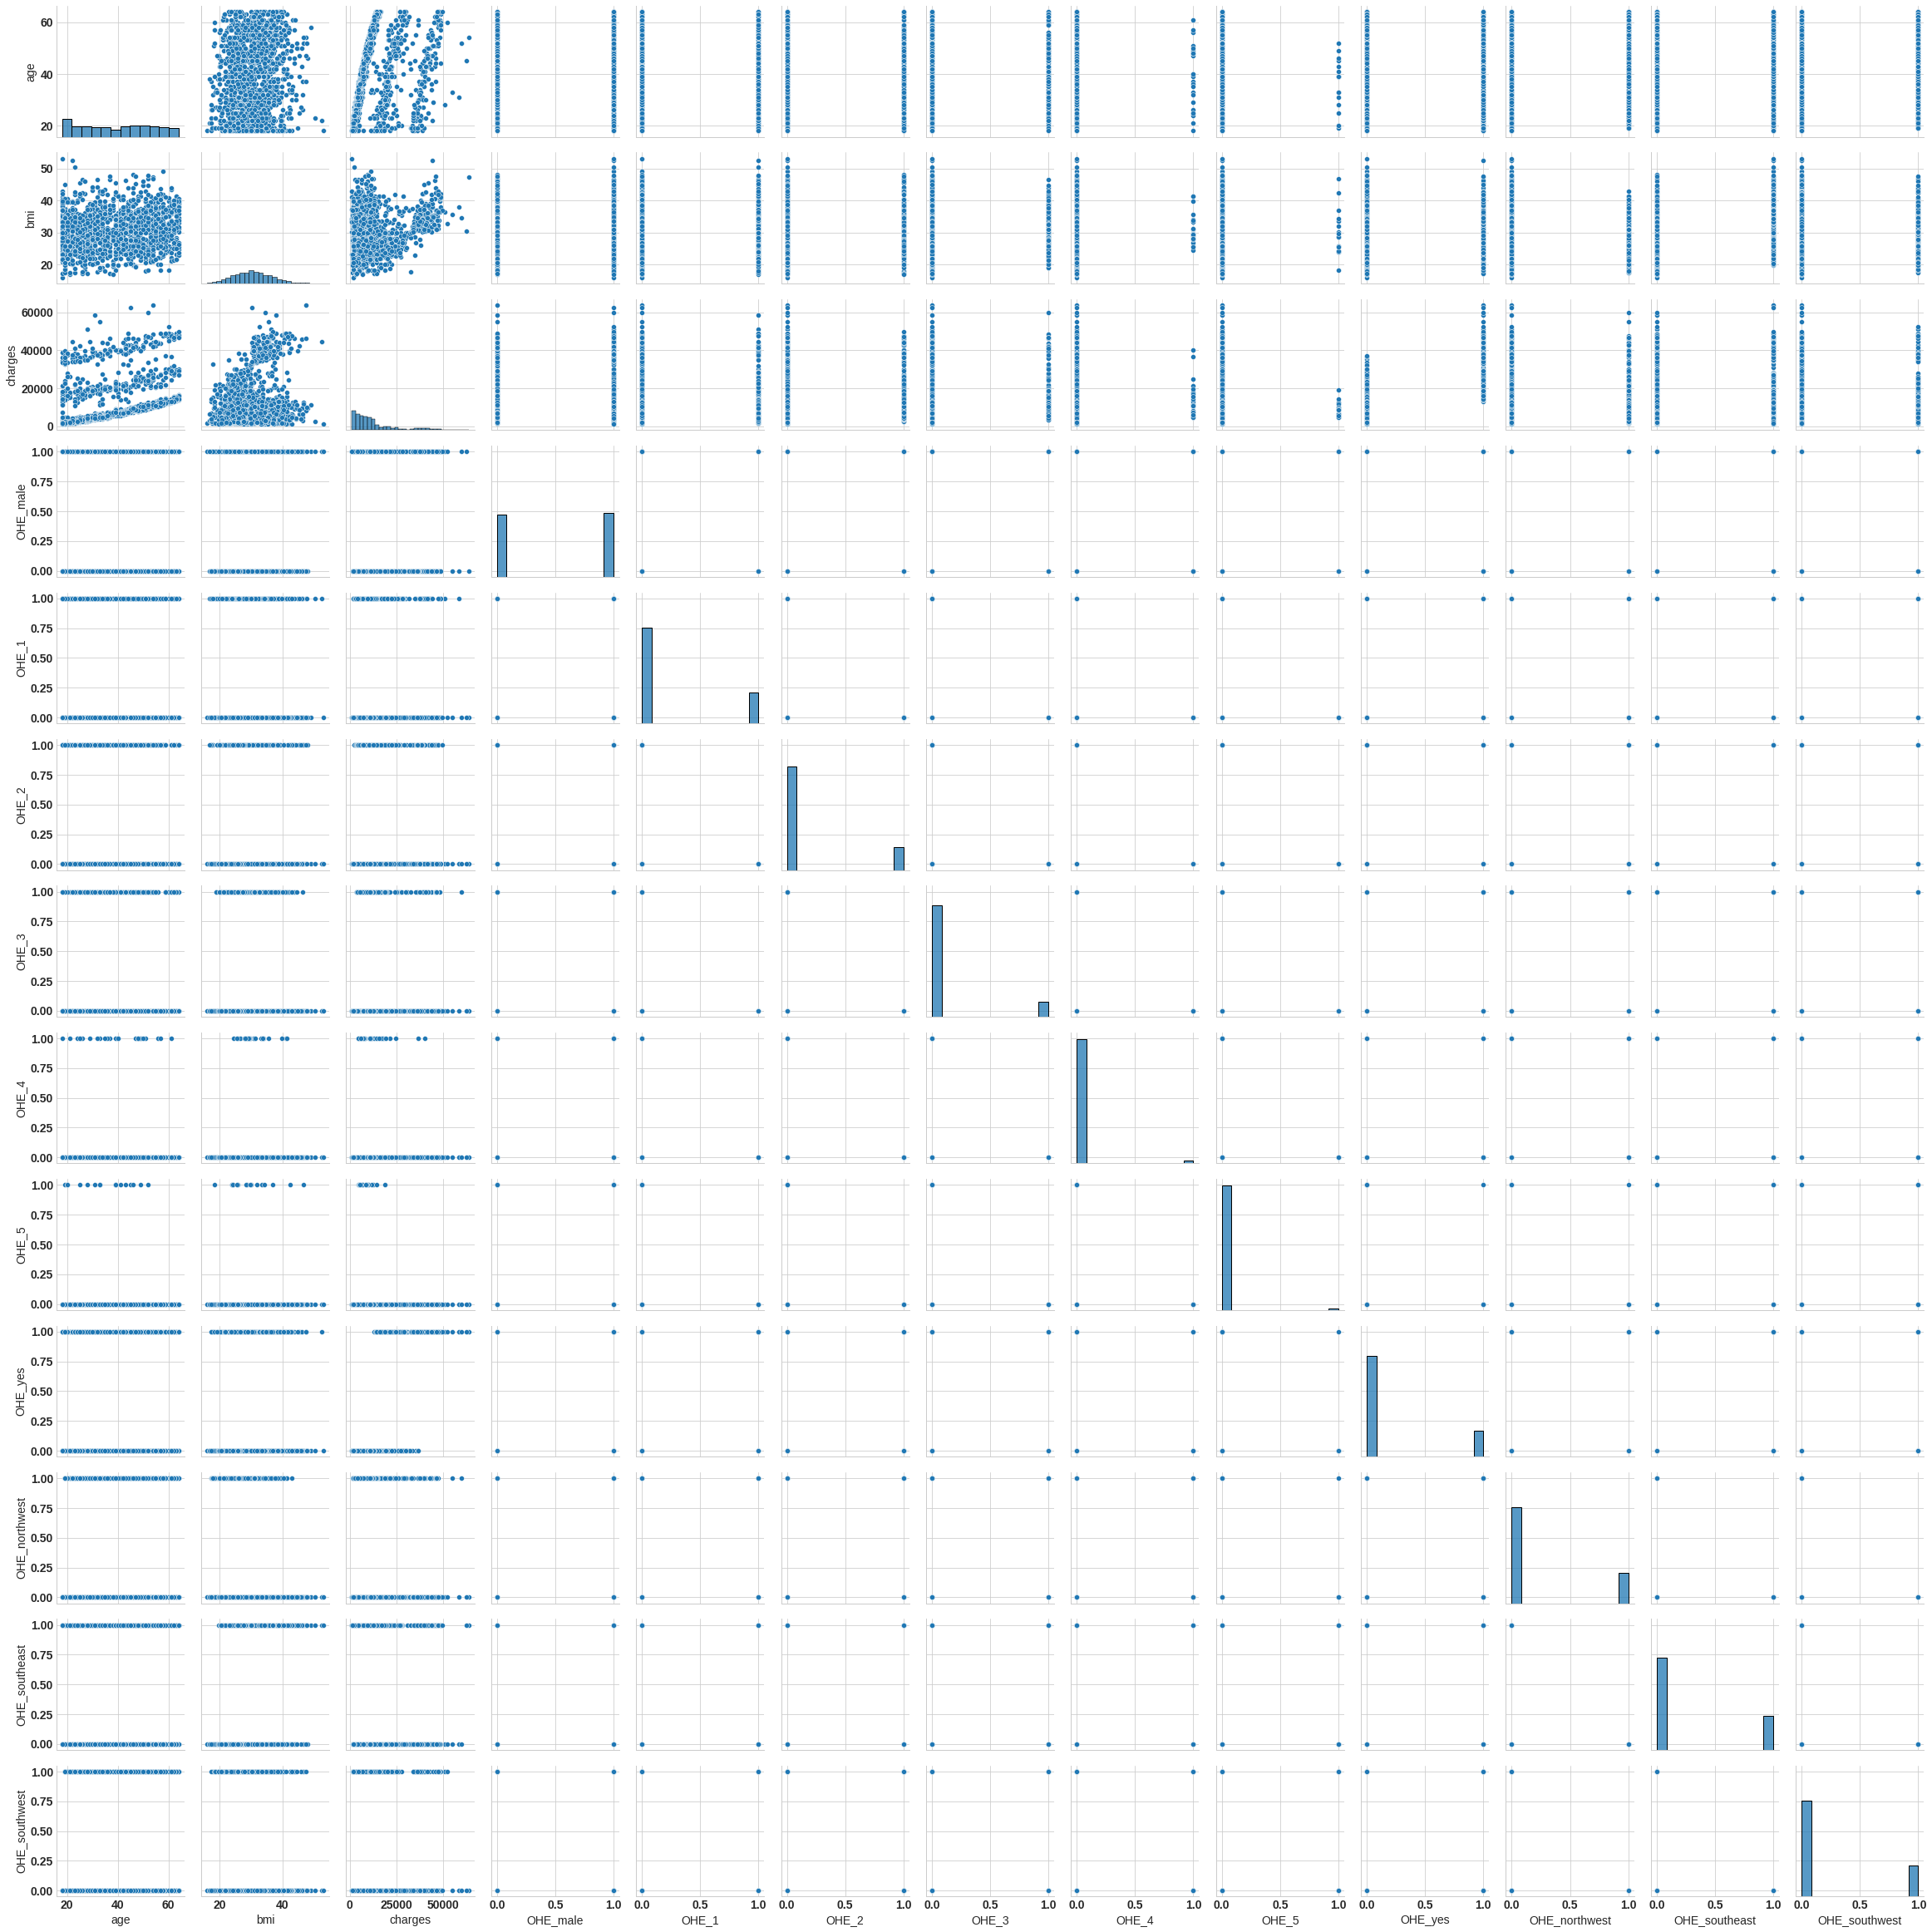

In [ ]:
sns.pairplot(df_encode)
plt.tight_layout()
plt.show()

In [ ]:
df1 = df.copy()

In [ ]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
cols = ['sex','smoker','region']
df1_labels = df[cols].apply(LabelEncoder().fit_transform)

In [ ]:
df1_labels.columns

Index(['sex', 'smoker', 'region'], dtype='object')

# Train-Test split

In [ ]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges',axis=1) # Independet variable
y = df_encode['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [ ]:
# Label encoder Train_Test split
from sklearn.model_selection import train_test_split
X1 = df1  # Independent variable
y1 = df1_labels # dependent variable
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size=0.2,random_state=23)


# Model building

In [ ]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) 

LinearRegression()

In [ ]:
# Finding interception and coefficients
print(lin_reg.intercept_)
print(list(lin_reg.coef_))

-11738.954855430975
[246.27260255058226, 347.98808787938015, -127.95517824933252, 321.84688294875554, 1476.2690201894516, 1198.109155838507, 3767.4091057098785, 1964.3992282646693, 24252.366361564928, -551.1519437465203, -1180.0107542019189, -1512.9567434042253]


In [ ]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)
     


The Mean Square Error(MSE) or J(theta) is:  35152074.79986037
R square obtain for scikit learn library is : 0.730528429980745


In [ ]:
# Fitting the linear regression model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)
y_pred

array([ 8.41839988e+03,  1.30405933e+04,  7.14161993e+03,  9.33597966e+03,
        3.02894974e+04,  3.09576404e+04,  1.83055772e+03,  6.24652803e+03,
        1.54767925e+04,  8.10203420e+03,  3.71377301e+04,  8.93342647e+03,
        1.66940527e+04,  1.23593283e+04,  7.29357285e+03,  3.87567286e+04,
        8.53348747e+03,  1.23058691e+04,  3.26151869e+04,  1.21865229e+04,
        1.33443308e+04,  1.08250315e+04,  4.05194337e+04,  1.36466987e+04,
        3.44517240e+04,  3.25237985e+03,  3.20524891e+04,  3.23365711e+04,
        4.48882063e+03,  2.36294455e+03,  1.12185072e+04,  1.30933047e+04,
        7.96987933e+03,  2.90288535e+03,  2.91482473e+03,  6.74797104e+03,
        1.40219731e+04,  1.24855930e+04,  3.24715875e+04,  3.35086228e+04,
        1.41718781e+04,  9.15944155e+03,  2.74680759e+03,  5.99301821e+02,
        5.97177503e+03,  3.31190844e+04,  2.34681041e+03,  1.12553537e+04,
        8.38785635e+03,  1.29616919e+04,  9.94509716e+03,  7.92265950e+03,
        3.25155440e+04,  

In [ ]:
# Fitting the linear regression model with label encoded column
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train1,y_train1)
y_pred1 = regr.predict(X_train1)
y_pred1

array([[ 7.92384094e-13, -3.36753403e-13, -1.44578578e-14],
       [ 1.00000000e+00,  3.28060875e-13,  3.00000000e+00],
       [ 1.00000000e+00, -4.22613936e-13,  1.00000000e+00],
       ...,
       [ 4.99783855e-13, -3.55216040e-13,  3.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  6.26059997e-14],
       [-4.78817102e-13, -2.12534931e-13, -9.22004820e-15]])

In [ ]:
# Use MSE to evaluate the above model
print("R squared: {}".format(r2_score(y_true = y_train,y_pred= y_pred)))

R squared: 0.7578702899704812


In [ ]:
# Use MSE to evaluate the above model
print('R squared: {}'.format(r2_score(y_true = y_train1,y_pred = y_pred1)))

R squared: 1.0


In [ ]:
# This is homework on testing data
# Fitting the linear regression model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr1 = linear_model.LinearRegression()
regr1.fit(X_train,y_train)
y_pred_test = regr1.predict(X_test)
y_pred_test

array([ 1.15839812e+04,  6.86394036e+03,  3.21344560e+04,  1.00956294e+04,
        8.09688218e+03,  9.80033936e+03,  3.55440461e+04,  8.52492601e+03,
        1.24554569e+04,  4.00337920e+04,  1.42854546e+03,  3.70793659e+04,
        4.25788027e+03,  1.23493148e+04,  7.98417964e+03,  4.99199838e+03,
        4.85905568e+03,  3.60098320e+03,  3.53739468e+04,  3.36987955e+04,
        3.88457456e+04,  1.33069491e+04,  8.59869739e+03,  9.80119916e+03,
        3.56575150e+04,  6.52535038e+03,  5.07071237e+03,  2.93733836e+04,
        2.18821156e+02,  1.11723188e+04,  1.37388264e+04,  4.81969196e+03,
        3.68891554e+03,  1.18335496e+04,  9.27639179e+03,  2.92134212e+04,
        1.07689698e+04,  1.10565764e+04,  1.01985550e+04,  4.88641001e+03,
        1.09494268e+04,  3.46947423e+04,  1.08311829e+04,  3.23600278e+04,
        1.10352516e+04,  1.33753675e+04,  4.67810049e+03,  5.89371047e+03,
        8.56776999e+03,  5.78452040e+03,  1.33191746e+04,  9.28791449e+03,
        1.02573957e+04,  

In [ ]:
# This is homework on testing data label encoded columns
# Fitting the linear regression model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr1 = linear_model.LinearRegression()
regr1.fit(X_train1,y_train1)
y_pred_test1 = regr1.predict(X_test1)
y_pred_test1

array([[-2.43715651e-12, -1.94085244e-14,  3.00000000e+00],
       [ 1.00000000e+00, -3.86747156e-13, -1.69304370e-14],
       [ 1.00000000e+00,  1.00000000e+00,  1.66959258e-14],
       [-1.10945840e-12,  5.58064671e-13,  2.59553295e-14],
       [ 2.00530372e-12, -4.69372153e-13,  1.00000000e+00],
       [ 1.00000000e+00, -2.84757571e-13,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00],
       [ 1.00000000e+00, -4.86925834e-14, -2.05781696e-15],
       [-2.46923213e-12,  2.42048542e-14,  2.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00],
       [ 1.68307044e-12, -4.97331640e-13,  3.00000000e+00],
       [-2.46404450e-12,  1.00000000e+00,  1.00000000e+00],
       [ 2.04151876e-12, -4.90804344e-13, -2.18107869e-14],
       [-2.62126857e-12,  3.59124282e-14,  1.00000000e+00],
       [ 3.21330794e-14, -3.30618384e-13,  3.00000000e+00],
       [ 1.00000000e+00, -3.99505642e-13,  3.00000000e+00],
       [ 1.00000000e+00, -3.12712220e-13

In [ ]:
# Use MSE to evaluate the above model(assignment)
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred_test)))

R squared: 0.730528429980745


In [ ]:
# Use MSE to evaluate the above model(assignment) on label encoded on columns
print("R squared: {}".format(r2_score(y_true=y_test1,y_pred=y_pred_test1)))

R squared: 1.0


# Assumptions

# 1. Linearity

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


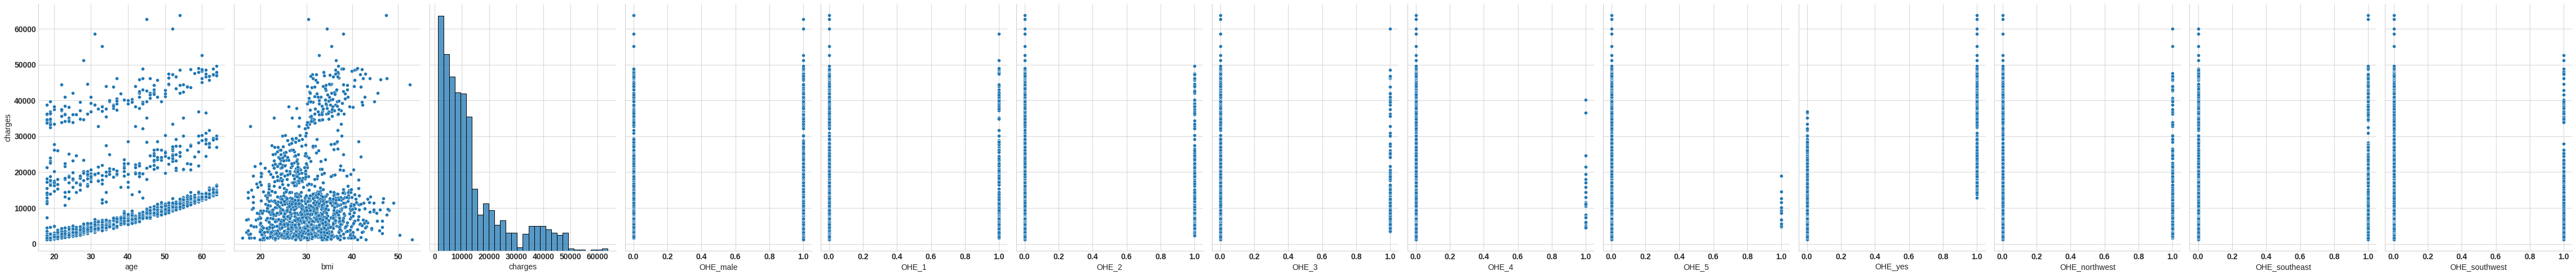

In [ ]:
p = sns.pairplot(df_encode,x_vars=df_encode.columns,y_vars='charges', size=7,aspect = 0.7)
plt.tight_layout()
plt.show()

# 2. Mean of residuals

In [ ]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean_of_residuals {}".format(mean_residuals))

Mean_of_residuals -2.1104941156525644e-12


# 3. Check for homoscedasticity

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


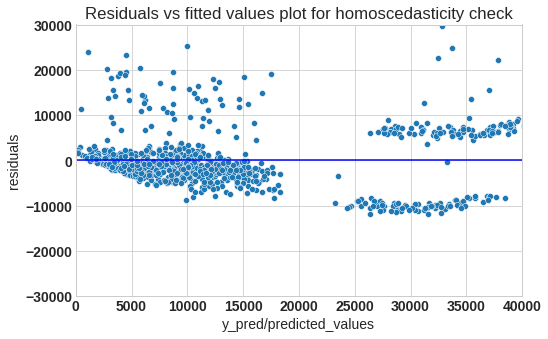

In [ ]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted_values')
plt.ylabel('residuals')
plt.ylim(-30000,30000)
plt.xlim(0,40000)
p = sns.lineplot([0,40000],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

# Goldfeld Quandt Test

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statstic','p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statstic', 1.083067233796656), ('p-value', 0.19726818710578425)]

# 4. Check for Normality of error terms/residuals

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


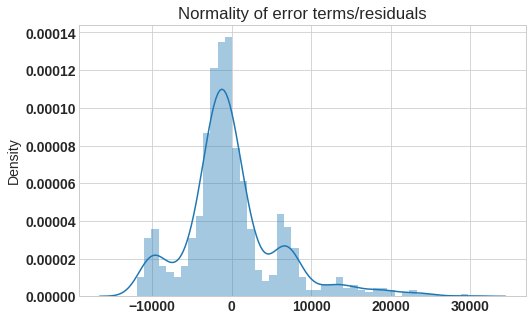

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

# 5. No autocorrelation of residuals

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


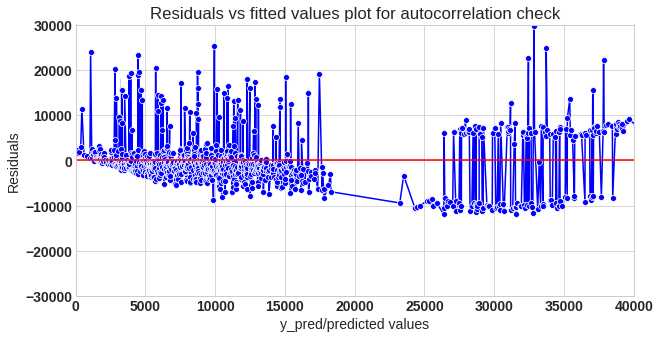

In [ ]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-30000,30000)
plt.xlim(0,40000)
p = sns.lineplot([0,40000],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

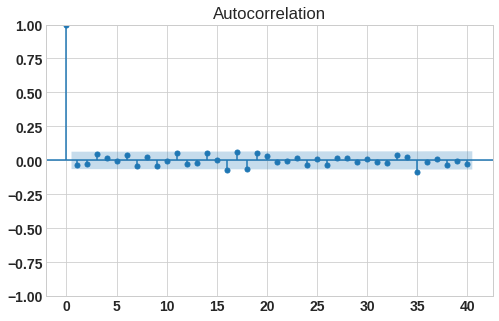

In [ ]:
import statsmodels.api as sm
# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


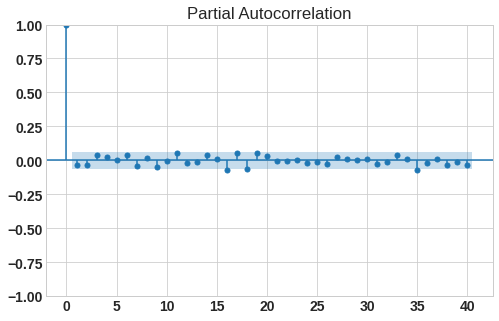

In [ ]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

# 6. No perfect multicollinearity

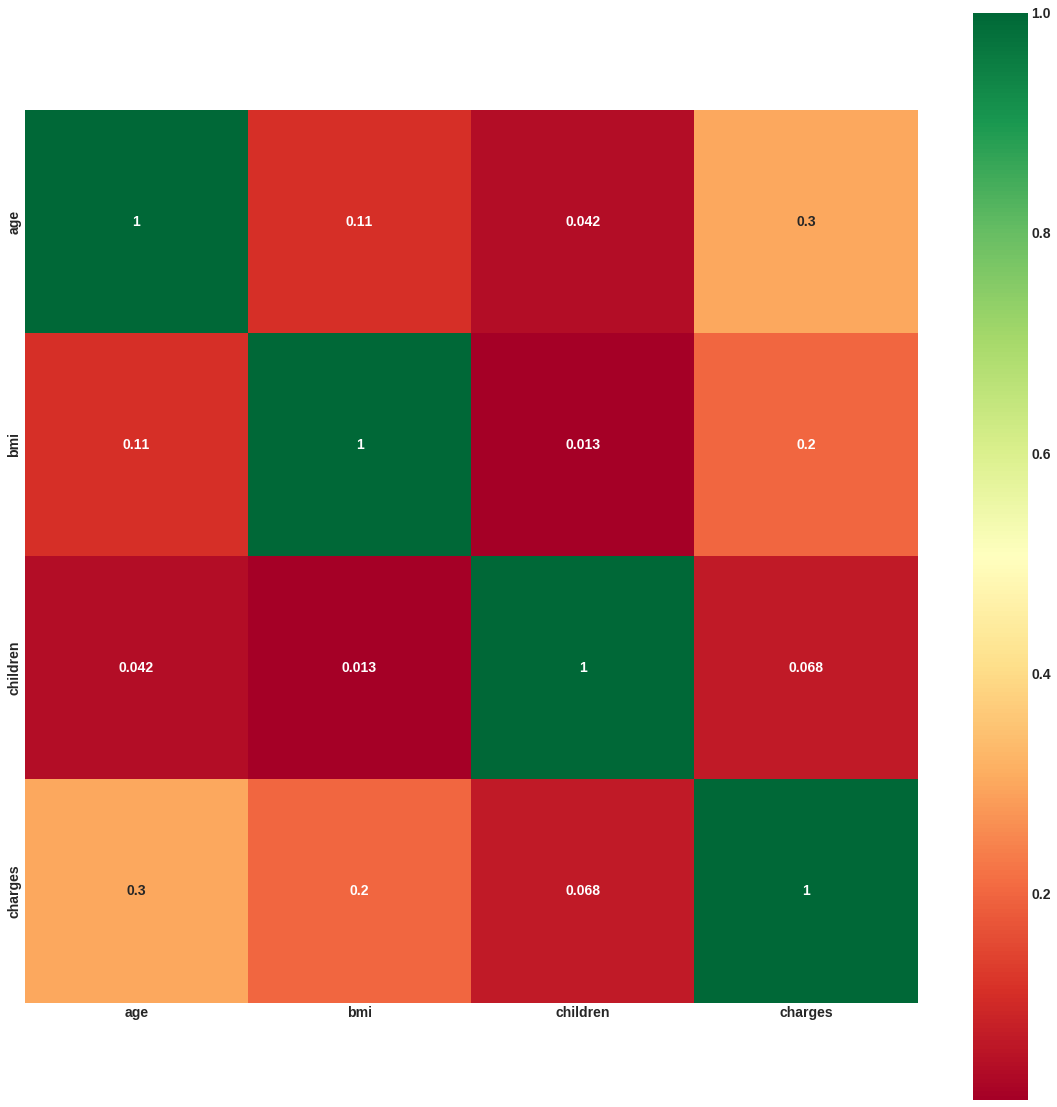

In [ ]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

In [ ]:
# For train model
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(X_train,y_train)
dec_tree_y_pred = dec_tree.predict(X_train)
print("Accuracy: {}".format(dec_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=dec_tree_y_pred)))

Accuracy: 0.9987210174135905
R squared: 0.9987210174135905


In [ ]:
# For train model
from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(random_state=0)
rf_tree.fit(X_train,y_train)
rf_tree_y_pred = rf_tree.predict(X_train)
print("Accuracy: {}".format(rf_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=rf_tree_y_pred)))

Accuracy: 0.9764825300912868
R squared: 0.9764825300912868


In [ ]:
# For test model
from sklearn.ensemble import RandomForestRegressor

rfr_tree = RandomForestRegressor(random_state=0)
rfr_tree.fit(X_test,y_test)
rfr_tree_y_test_pred = rfr_tree.predict(X_test)
print("Accuracy: {}".format(rfr_tree.score(X_test,y_test)))
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=rfr_tree_y_test_pred)))
     


Accuracy: 0.9743893466422924
R squared: 0.9743893466422924
